In [755]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

In [756]:
pip install pyspark

In [757]:
pip install findspark

In [758]:
import findspark
findspark.init()

from pyspark.sql import SparkSession

In [759]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

In [760]:
# Initialize the spark on jupyter notebook
import os
import sys

os.environ['PYSPARK_PYTHON'] = sys.executable

os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable

In [761]:
# Initializing the sparksesstion
spark = SparkSession.builder.appName('Name').config('config_option', 'value').getOrCreate()

In [762]:
# Load the dfset
drive.mount('/content/drive')
df = spark.read.option('inferSchema', True).csv('/content/drive/MyDrive/MDS/DATA6300/final_project/micro_world.csv', header=True)

# Checking dataset
df.show(2)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
+-------------+-----------+-----------------+------------+-----------+---------------+------+---+----+-----+-------+-----------+-----------+---+---+---+---+----+----+----+----+----+----+----+----+----+----+---+---+---+---+----+---+---+----+----+----+----+----+---+----+----+----+----+----+----+----+---+----+----+----+----+----+----+----+----+----+----+----+---+----+----+----+----+----+----+----+---+---+----+-----+----+----+----+---+----+-----+----+----+----+----+----+----+----+-----+--------+
|      economy|economycode|         regionwb|   pop_adult|wpid_random|            wgt|female|age|educ|inc_q|account|account_fin|account_mob| q2| q3| q4| q5|  q6| q8a| q8b| q8c| q8d| q8e| q8f| q8g| q8h| q8i| q9|q10|q11|q12| q13|q14|q16|q17a|q17b|q17c|q18a|q18b|q20|q21a|q21b|q21c|q21d|q22a|q22b|q22c|q24| q25| q26|q27a|q27b|q27c|q27d| q28|q29a|q29b|q29c|q29d|q30|q31a|q31b|q3

In [763]:
# Checking the dataset schema
df.printSchema()

root
 |-- economy: string (nullable = true)
 |-- economycode: string (nullable = true)
 |-- regionwb: string (nullable = true)
 |-- pop_adult: double (nullable = true)
 |-- wpid_random: integer (nullable = true)
 |-- wgt: double (nullable = true)
 |-- female: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- educ: integer (nullable = true)
 |-- inc_q: integer (nullable = true)
 |-- account: integer (nullable = true)
 |-- account_fin: integer (nullable = true)
 |-- account_mob: integer (nullable = true)
 |-- q2: integer (nullable = true)
 |-- q3: integer (nullable = true)
 |-- q4: integer (nullable = true)
 |-- q5: integer (nullable = true)
 |-- q6: integer (nullable = true)
 |-- q8a: integer (nullable = true)
 |-- q8b: integer (nullable = true)
 |-- q8c: integer (nullable = true)
 |-- q8d: integer (nullable = true)
 |-- q8e: integer (nullable = true)
 |-- q8f: integer (nullable = true)
 |-- q8g: integer (nullable = true)
 |-- q8h: integer (nullable = true)
 |-- q8i: in

In [764]:
# To count the total sample in the dataframe.
print('Number of samples: \t', df.count())

# The number of features can be counted in this way
print('Number of features: \t', len(df.columns))

# To view the names of the features
print('\nName of columns: \n', df.columns)

Number of samples: 	 146688
Number of features: 	 86

Name of columns: 
 ['economy', 'economycode', 'regionwb', 'pop_adult', 'wpid_random', 'wgt', 'female', 'age', 'educ', 'inc_q', 'account', 'account_fin', 'account_mob', 'q2', 'q3', 'q4', 'q5', 'q6', 'q8a', 'q8b', 'q8c', 'q8d', 'q8e', 'q8f', 'q8g', 'q8h', 'q8i', 'q9', 'q10', 'q11', 'q12', 'q13', 'q14', 'q16', 'q17a', 'q17b', 'q17c', 'q18a', 'q18b', 'q20', 'q21a', 'q21b', 'q21c', 'q21d', 'q22a', 'q22b', 'q22c', 'q24', 'q25', 'q26', 'q27a', 'q27b', 'q27c', 'q27d', 'q28', 'q29a', 'q29b', 'q29c', 'q29d', 'q30', 'q31a', 'q31b', 'q31c', 'q32', 'q33a', 'q33b', 'q33c', 'q34', 'q35', 'q36a', 'q36bc', 'q36d', 'q37', 'q38', 'q39', 'q40a', 'q40bc', 'q40d', 'q41', 'q42', 'q43', 'q44a', 'q44b', 'q44c', 'saved', 'borrowed']


In [765]:
def gender_status(category):
    if category == 1:
        return 'male'
    else:
        return 'female'

In [766]:
def education_level_status(category):
    if category == 1:
        return 'completed primary or less'
    elif category == 2:
        return 'secondary'
    elif category == 3:
        return 'completed tertiary or more'
    else:
        return 'NULL'

In [767]:
def domistic_remittances_status(category):
    if category == 1:
        return 'cash'
    elif category == 2:
        return 'credit'
    else:
        return 'NULL'

In [768]:
def universal_status_checking_function(category):
    if category == 1:
        return 'yes'
    elif category == 2:
        return 'no'
    else:
        return 'NULL'

In [769]:
# Creating udf using the defined functions
gender_status = udf(gender_status, StringType())
education_level_status = udf(education_level_status, StringType())
financial_account_status = udf(universal_status_checking_function, StringType())
online_bill_payment_status = udf(universal_status_checking_function, StringType())
domistic_remittances_status = udf(domistic_remittances_status, StringType())
utility_bill_payment_status = udf(universal_status_checking_function, StringType())
agricultural_payment_status = udf(universal_status_checking_function, StringType())
savings_status = udf(universal_status_checking_function, StringType())
borrowing_status = udf(universal_status_checking_function, StringType())

# Creating new columns using the udf
df = df.withColumn('gender_status', gender_status(df['female']))
df = df.withColumn('education_level_status', education_level_status(df['educ']))
df = df.withColumn('financial_account_status', financial_account_status(df['account_fin']))
df = df.withColumn('online_bill_payment_status', online_bill_payment_status(df['q16']))
df = df.withColumn('domistic_remittances_status', domistic_remittances_status(df['q29a']))
df = df.withColumn('utility_bill_payment_status', utility_bill_payment_status(df['q30']))
df = df.withColumn('agricultural_payment_status', agricultural_payment_status(df['q44a']))
df = df.withColumn('savings_status', savings_status(df['saved']))
df = df.withColumn('borrowing_status', borrowing_status(df['borrowed']))

In [770]:
from pyspark.sql.functions import mean

numerical_features = ['age', 'educ', 'q3', 'q4', 'q6', 'q8a', 'q8b', 'q8c', 'q8d', 'q8e', 'q8f', 'q8g', 'q8h', 'q8i', 'q9', 'q10', 'q11', 'q12', 'q13', 'q14', 'q18b', 'q21b', 'q25', 'q26', 'q27a', 'q27b', 'q27c', 'q27d', 'q28', 'q29a', 'q29b', 'q29c', 'q29d', 'q31a', 'q31b', 'q31c', 'q32', 'q33a', 'q33b', 'q33c', 'q35', 'q36a', 'q36bc', 'q36d', 'q37', 'q38', 'q40a', 'q40bc', 'q40d', 'q41', 'q42', 'q43', 'q44a', 'q44b', 'q44c']

mean_values = df.agg(*[mean(c).alias(c) for c in numerical_features]).collect()[0]

# Fill missing values with the computed means
for feature in numerical_features:
    df = df.fillna(mean_values[feature], subset=[feature])


In [771]:
from pyspark.sql.functions import col

# Assuming 'df' is your DataFrame with missing values
# Replace 'categorical_features' with the list of categorical feature column names
categorical_features = ['regionwb', 'gender_status', 'education_level_status', 'financial_account_status', 'online_bill_payment_status', 'domistic_remittances_status', 'utility_bill_payment_status', 'agricultural_payment_status', 'savings_status']

# Fill missing values with the mode (most frequent value) for each categorical feature
for feature in categorical_features:
    mode_value = df.groupBy(feature).count().orderBy(col("count").desc()).first()[feature]
    df = df.fillna(mode_value, subset=[feature])

In [772]:
# Show the DataFrame after filling missing values
df.show()

+-------------+-----------+-----------------+------------+-----------+-----------------+------+---+----+-----+-------+-----------+-----------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----+----+----+----+----+---+----+----+----+----+----+----+----+---+---+---+----+----+----+----+---+----+----+----+----+---+----+----+----+---+----+----+----+---+---+----+-----+----+---+---+---+----+-----+----+---+---+---+----+----+----+-----+--------+-------------+----------------------+------------------------+--------------------------+---------------------------+---------------------------+---------------------------+--------------+----------------+
|      economy|economycode|         regionwb|   pop_adult|wpid_random|              wgt|female|age|educ|inc_q|account|account_fin|account_mob| q2| q3| q4| q5| q6|q8a|q8b|q8c|q8d|q8e|q8f|q8g|q8h|q8i| q9|q10|q11|q12|q13|q14|q16|q17a|q17b|q17c|q18a|q18b|q20|q21a|q21b|q21c|q21d|q22a|q22b|q22c|q24|q25|q26|q27a|q27b|q27c

In [773]:
missing_values = df.toPandas().isna().sum()

missing_values[missing_values > 0]

inc_q             16
account_mob    72390
dtype: int64

In [774]:
# Assuming 'df' is your DataFrame and 'columns_to_drop' is a list of columns you want to drop
columns_to_drop = ['inc_q', 'account_mob']

# Drop the specified columns
df = df.drop(*columns_to_drop)

In [775]:
df.limit(5).toPandas()

,economy,economycode,regionwb,pop_adult,wpid_random,wgt,female,age,educ,account,...,borrowed,gender_status,education_level_status,financial_account_status,online_bill_payment_status,domistic_remittances_status,utility_bill_payment_status,agricultural_payment_status,savings_status,borrowing_status
0,United States,USA,High Income: OECD,254334784.0,155658892,1.024508,2,35,3,1,...,2,female,completed tertiary or more\t,yes,yes,NULL,yes,NULL,yes,no
1,United States,USA,High Income: OECD,254334784.0,114289412,1.400376,2,18,2,1,...,2,female,secondary,yes,yes,NULL,no,NULL,yes,no
2,United States,USA,High Income: OECD,254334784.0,138183589,1.411419,2,28,3,1,...,1,female,completed tertiary or more\t,yes,yes,NULL,yes,NULL,yes,yes
3,United States,USA,High Income: OECD,254334784.0,123711439,1.031085,2,18,2,1,...,1,female,secondary,yes,yes,NULL,no,NULL,yes,yes
4,United States,USA,High Income: OECD,254334784.0,169099047,2.490221,1,60,2,1,...,2,male,secondary,yes,no,NULL,yes,NULL,no,no


In [776]:
# Descriptive statistics of the dataframe
df.describe().show()

+-------+-----------+-----------+-------------------+-------------------+--------------------+------------------+------------------+-----------------+------------------+------------------+-------------------+------------------+-------------------+-------------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+-------------------+------------------+-------------------+-------------------+------------------+------------------+-------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+------------------+-------------------+-------------------+-----------------+------------------

In [777]:
# Summary of mean and median only
df.summary('mean', '50%').show()

+-------+-------+-----------+--------+-------------------+--------------------+------------------+------------------+-----------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+-----------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+--

In [778]:
# Summary() is similar to the describe() but it is more versatile
df.summary().show()

+-------+-----------+-----------+-------------------+-------------------+--------------------+------------------+------------------+-----------------+------------------+------------------+-------------------+------------------+-------------------+-------------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+-------------------+------------------+-------------------+-------------------+------------------+------------------+-------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+------------------+-------------------+-------------------+-----------------+------------------

In [779]:
# Descriptive statistics to check the minimum value of a feature
df.agg({'wgt':'min'}).show()

+----------------+
|        min(wgt)|
+----------------+
|0.10365560851443|
+----------------+



In [780]:
# Descriptive statistics of only selected columns
df.describe('economy', 'female').show()

+-------+-----------+------------------+
|summary|    economy|            female|
+-------+-----------+------------------+
|  count|     146688|            146688|
|   mean|       NULL|1.5305273778359512|
| stddev|       NULL|0.4990689102303522|
|    min|Afghanistan|                 1|
|    max|   Zimbabwe|                 2|
+-------+-----------+------------------+



In [781]:
# Descriptive statistics of only selected columns
df.describe('economy', 'age').show()

+-------+-----------+-----------------+
|summary|    economy|              age|
+-------+-----------+-----------------+
|  count|     146688|           146688|
|   mean|       NULL|41.61870773342059|
| stddev|       NULL|17.66739565605169|
|    min|Afghanistan|               15|
|    max|   Zimbabwe|               99|
+-------+-----------+-----------------+



In [782]:
# Descriptive statistics for checking the mean value of a feature
df.agg({'pop_adult':'mean'}).show()

+-------------------+
|     avg(pop_adult)|
+-------------------+
|7.164045761343315E7|
+-------------------+



In [783]:
# Summary of mean and standard deviation
df.select('educ').summary('mean', 'stddev').show()

+-------+------------------+
|summary|              educ|
+-------+------------------+
|   mean|1.8391483965968587|
| stddev|0.7075222184176605|
+-------+------------------+



In [784]:
# And finally we can choose both columns and measures
df.select('account').summary('mean', 'stddev').show()

+-------+------------------+
|summary|           account|
+-------+------------------+
|   mean| 1.423027105148342|
| stddev|0.4940413316478542|
+-------+------------------+



In [785]:
# Another way to check standard deviation.
from pyspark.sql.functions import avg, stddev
df.agg(avg('account_fin'), stddev('account_fin')).show()

+------------------+-------------------+
|  avg(account_fin)|stddev(account_fin)|
+------------------+-------------------+
|1.4381885362129145|0.49616632413672573|
+------------------+-------------------+



In [786]:
# This calculates the frequency and its repetition
df.freqItems(['domistic_remittances_status'], 0.01).show()

+-------------------------------------+
|domistic_remittances_status_freqItems|
+-------------------------------------+
|                 [credit, cash, NULL]|
+-------------------------------------+



In [787]:
# Random sample from the dataframe.
df_sample = df.sample(False, 0.01)
df_sample.show(5)

+-------------+-----------+-----------------+------------+-----------+-----------------+------+---+----+-------+-----------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----+----+----+----+----+---+----+----+----+----+----+----+----+---+---+---+----+----+----+----+---+----+----+----+----+---+----+----+----+---+----+----+----+---+---+----+-----+----+---+---+---+----+-----+----+---+---+---+----+----+----+-----+--------+-------------+----------------------+------------------------+--------------------------+---------------------------+---------------------------+---------------------------+--------------+----------------+
|      economy|economycode|         regionwb|   pop_adult|wpid_random|              wgt|female|age|educ|account|account_fin| q2| q3| q4| q5| q6|q8a|q8b|q8c|q8d|q8e|q8f|q8g|q8h|q8i| q9|q10|q11|q12|q13|q14|q16|q17a|q17b|q17c|q18a|q18b|q20|q21a|q21b|q21c|q21d|q22a|q22b|q22c|q24|q25|q26|q27a|q27b|q27c|q27d|q28|q29a|q29b|q29c|q29d|q30|q3

In [788]:
# Printing df_sample is 0.01 times df
print(df.count())
print(df_sample.count())

146688
1471


In [789]:
# distinct() removes the repetition in the selection
regions = df.select('regionwb').distinct()
regions.show(10)

+--------------------+
|            regionwb|
+--------------------+
|          South Asia|
|  Sub-Saharan Africa|
|Europe & Central ...|
|   High Income: OECD|
|         Middle East|
| East Asia & Pacific|
|Latin America & C...|
+--------------------+



In [790]:
# Counting the total unique values of regions
regions.count()

7

In [791]:
# Measuring the entries of the selected feature to perform some descriptive measurement grouping them
df.groupBy('economy').count().show()

+----------------+-----+
|         economy|count|
+----------------+-----+
|          Sweden| 1001|
|          Turkey| 1002|
|         Germany| 1012|
|          Jordan| 1000|
|          France| 1000|
|          Greece| 1000|
|         Belgium| 1004|
|   United States| 1021|
|           Italy| 1000|
|           Spain| 1000|
|      Bangladesh| 1000|
|       Indonesia| 1000|
|Egypt, Arab Rep.| 1000|
|    Saudi Arabia| 1018|
|  Czech Republic| 1008|
|         Lebanon| 1000|
|          Poland| 1000|
|         Romania|  998|
|         Hungary| 1003|
|        Pakistan| 1000|
+----------------+-----+
only showing top 20 rows



In [792]:
# Filter is to make a selection from the dataframe
df.filter(df['economy']=='China').show()

+-------+-----------+-------------------+-------------+-----------+-----------------+------+---+----+-------+-----------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----+----+----+----+----+---+----+----+----+----+----+----+----+---+---+---+----+----+----+----+---+----+----+----+----+---+----+----+----+---+----+----+----+---+---+----+-----+----+---+---+---+----+-----+----+---+---+---+----+----+----+-----+--------+-------------+----------------------+------------------------+--------------------------+---------------------------+---------------------------+---------------------------+--------------+----------------+
|economy|economycode|           regionwb|    pop_adult|wpid_random|              wgt|female|age|educ|account|account_fin| q2| q3| q4| q5| q6|q8a|q8b|q8c|q8d|q8e|q8f|q8g|q8h|q8i| q9|q10|q11|q12|q13|q14|q16|q17a|q17b|q17c|q18a|q18b|q20|q21a|q21b|q21c|q21d|q22a|q22b|q22c|q24|q25|q26|q27a|q27b|q27c|q27d|q28|q29a|q29b|q29c|q29d|q30|q31a|q31

In [793]:
# Filter is to make a selection from the dataframe
df.filter(df['economy']=='Russian Federation').show()

+------------------+-----------+------------------+------------+-----------+-----------------+------+---+----+-------+-----------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----+----+----+----+----+---+----+----+----+----+----+----+----+---+---+---+----+----+----+----+---+----+----+----+----+---+----+----+----+---+----+----+----+---+---+----+-----+----+---+---+---+----+-----+----+---+---+---+----+----+----+-----+--------+-------------+----------------------+------------------------+--------------------------+---------------------------+---------------------------+---------------------------+--------------+----------------+
|           economy|economycode|          regionwb|   pop_adult|wpid_random|              wgt|female|age|educ|account|account_fin| q2| q3| q4| q5| q6|q8a|q8b|q8c|q8d|q8e|q8f|q8g|q8h|q8i| q9|q10|q11|q12|q13|q14|q16|q17a|q17b|q17c|q18a|q18b|q20|q21a|q21b|q21c|q21d|q22a|q22b|q22c|q24|q25|q26|q27a|q27b|q27c|q27d|q28|q29a|q29b|q29c

In [794]:
def pieplot(df, col, lim=20, yname=None):

    '''
    This function makes a pie chart for the Spark dataframe df
    for categorical column col only selecting top categories
    as specified by lim.
    '''

    # Grouping by the categories, counting on each categories
    # and ordering them by the count
    classes = df.groupBy(col).count().orderBy('count', ascending=False)

    # Take first 'lim' number of rows and convert to pandas
    pd_df = classes.limit(lim).toPandas()

    # Making plot
    pd_df.plot(kind='pie', x=col, y='count', \
           labels=pd_df[col], legend=False,  autopct='%1.1f%%')
    plt.title(yname)
    plt.xlabel(None)
    plt.ylabel(None)
    plt.show()

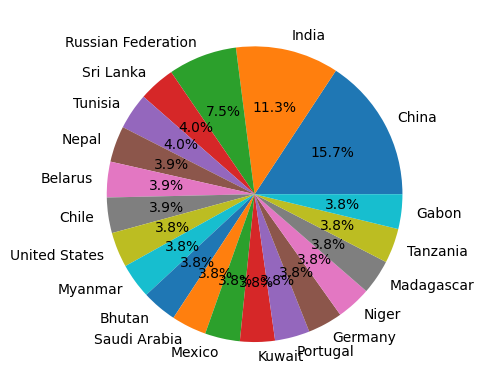

In [795]:
pieplot(df, 'economy')

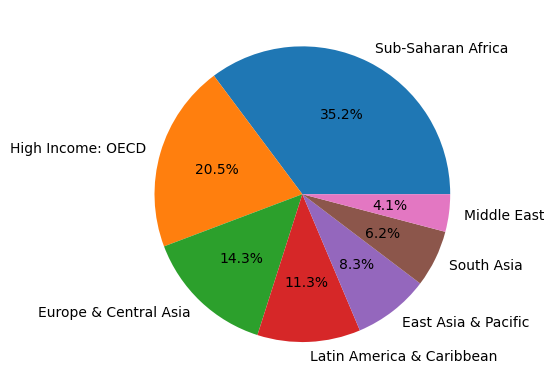

In [796]:
pieplot(df, 'regionwb')

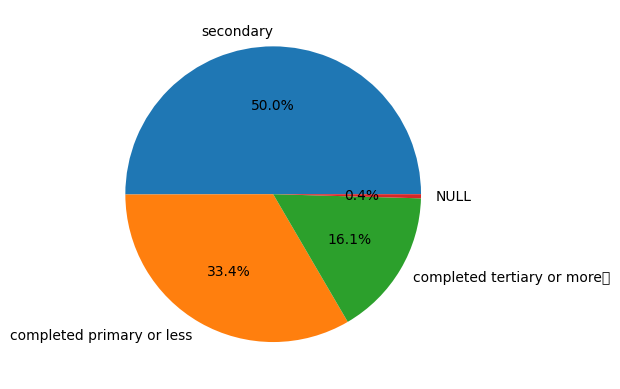

In [797]:
pieplot(df, 'education_level_status')

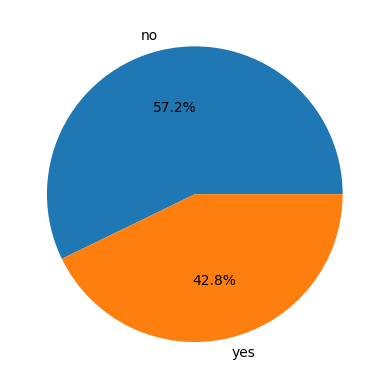

In [798]:
pieplot(df, 'borrowing_status')

In [799]:
def histogram(df, col, bins=10, xname=None, yname=None):

    '''
    This function makes a histogram from spark dataframe named
    df for column name col.
    '''

    # Calculating histogram in Spark
    vals = df.select(col).rdd.flatMap(lambda x: x).histogram(bins)

    # Preprocessing histogram points and locations
    width = vals[0][1] - vals[0][0]
    loc = [vals[0][0] + (i+1) * width for i in range(len(vals[1]))]

    # Making a bar plot
    plt.bar(loc, vals[1], width=width)
    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.show()

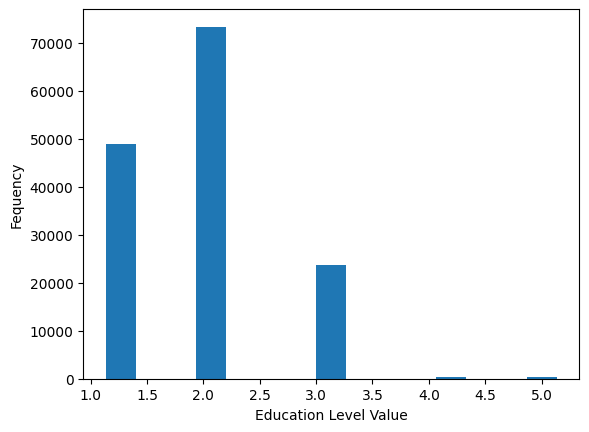

In [800]:
histogram(df, 'educ', bins=15, xname='Education Level Value', yname='Fequency')

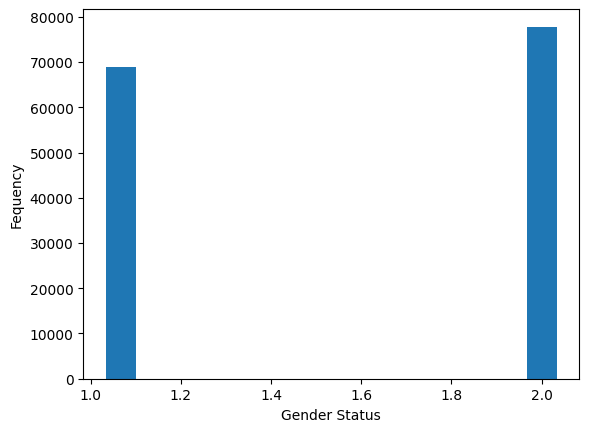

In [802]:
histogram(df, 'female', bins=15, xname='Gender Status', yname='Fequency')

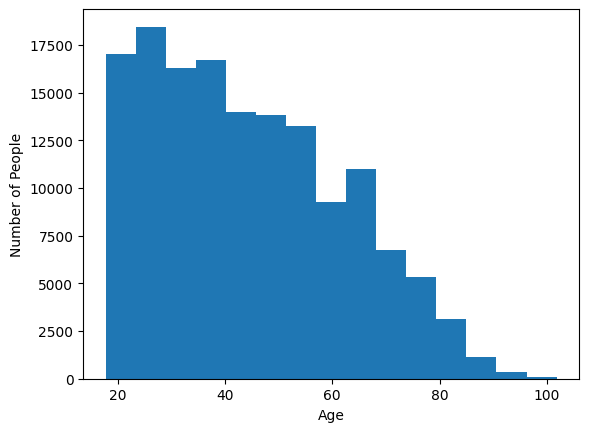

In [803]:
histogram(df, 'age', bins=15, xname='Age', yname='Number of People')

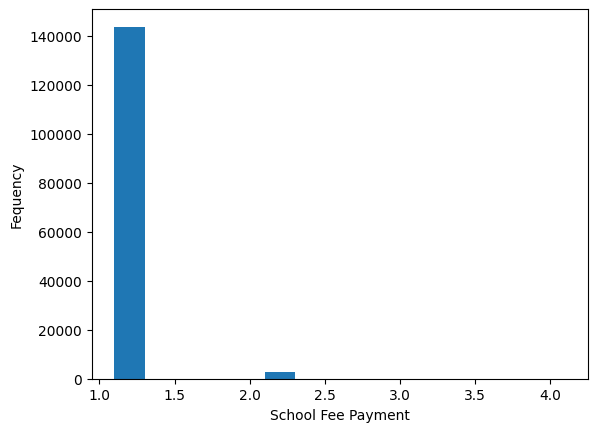

In [804]:
histogram(df, 'q33a', bins=15, xname='School Fee Payment', yname='Fequency')

In [805]:
df.select('q33a').summary().show()

+-------+------------------+
|summary|              q33a|
+-------+------------------+
|  count|            146688|
|   mean|1.0205401941535777|
| stddev|0.1472630169804369|
|    min|                 1|
|    25%|                 1|
|    50%|                 1|
|    75%|                 1|
|    max|                 4|
+-------+------------------+



In [806]:
def lineplot(df, x, y, xname, yname, measure):

    '''
    This function makes a line plot from Spark dataframe df with
    independent variable x and averaged over y.
    '''

    if measure == 'mean':

        # Grouping the dataframe by x and averaging over y
        # Sorting is important because Spark shuffle the values
        # when doing the calculation

        pd_df = df.groupBy(x).mean(y).toPandas().sort_values(by=x)

        # Making plot using pandas
        pd_df.plot(x, 'avg({})'.format(y), legend=False)

    elif measure == 'total':
        pd_df = df.groupBy(x).sum(y).toPandas().sort_values(by=x)
        pd_df.plot(x, 'sum({})'.format(y), legend=False)

    elif measure == 'count':
        pd_df = df.groupBy(x).count().toPandas().sort_values(by=x)
        pd_df.plot(x, 'count', legend=False, figsize=(20, 5))

    plt.ylabel(y)
    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.show()

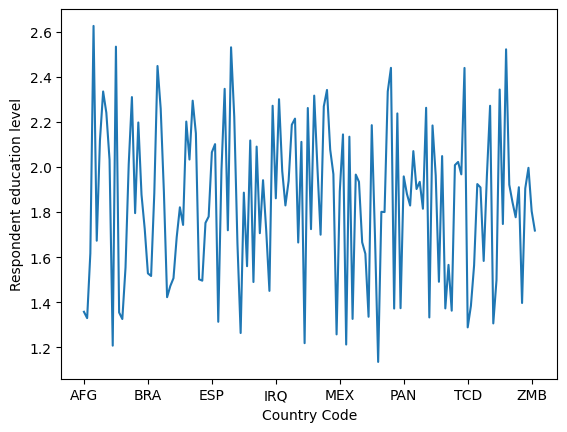

In [807]:
lineplot(df,'economycode', 'educ', xname='Country Code', yname= 'Respondent education level', measure='mean')

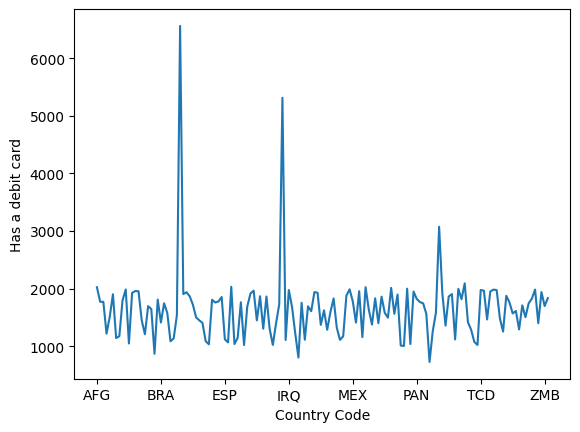

In [808]:
lineplot(df,'economycode', 'q2', xname='Country Code', yname= 'Has a debit card', measure='total')

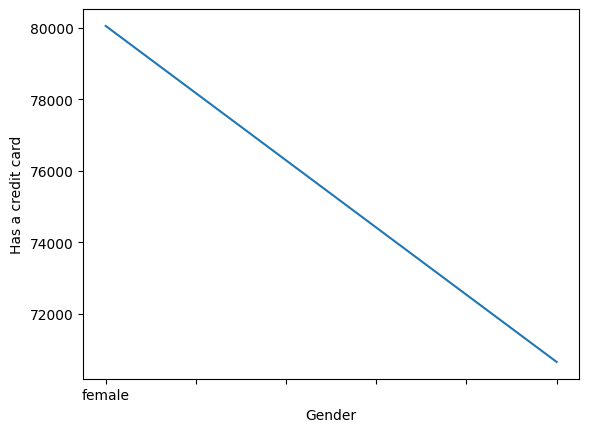

In [809]:
lineplot(df,'gender_status', 'q3', xname='Gender', yname= 'Has a credit card', measure='total')

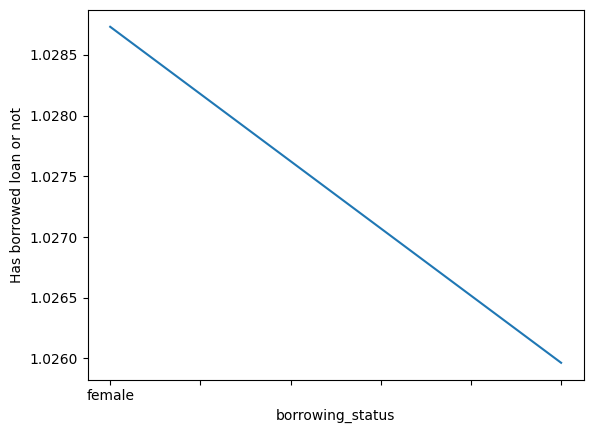

In [810]:
lineplot(df,'gender_status', 'q3', xname='borrowing_status', yname= 'Has borrowed loan or not', measure='mean')

In [811]:
def barplot(df, col, lim=10, yname=None):

    '''
    This function makes a bar plot for the Spark dataframe df
    for categorical column col only selecting top categories
    as specified by lim.
    '''

    # Grouping by the categories, counting on each categories
    # and ordering them by the count
    classes = df.groupBy(col).count().orderBy('count', ascending=False)

    # Take first 'lim' number of rows and convert to pandas
    pd_df = classes.limit(lim).toPandas()

    # Making plot
    pd_df.plot(kind='bar', x=col, legend=False)
    plt.ylabel(yname)
    plt.show()

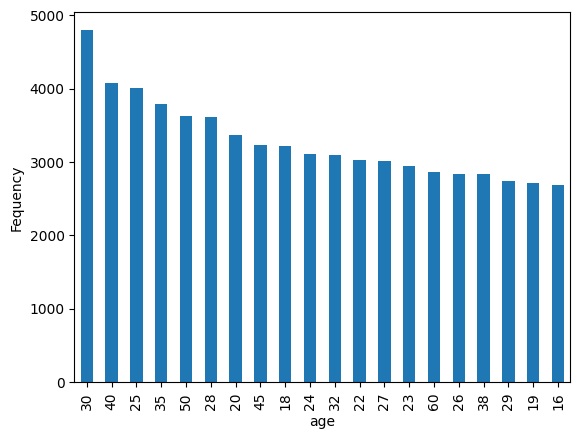

In [812]:
# Everybody is participating (almost)
barplot(df, 'age', lim=20, yname='Fequency')

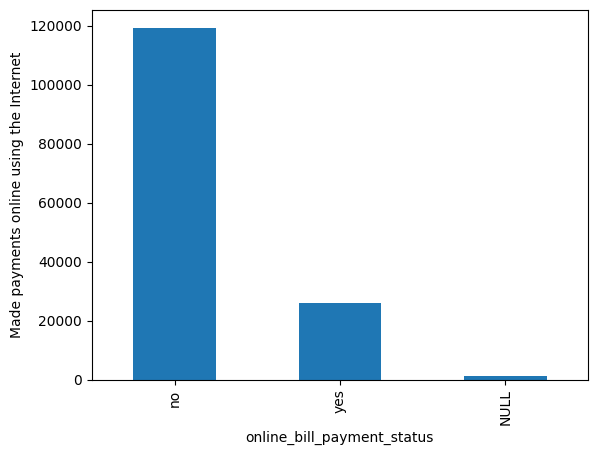

In [813]:
barplot(df, 'online_bill_payment_status', lim=20, yname='Made payments online using the Internet')

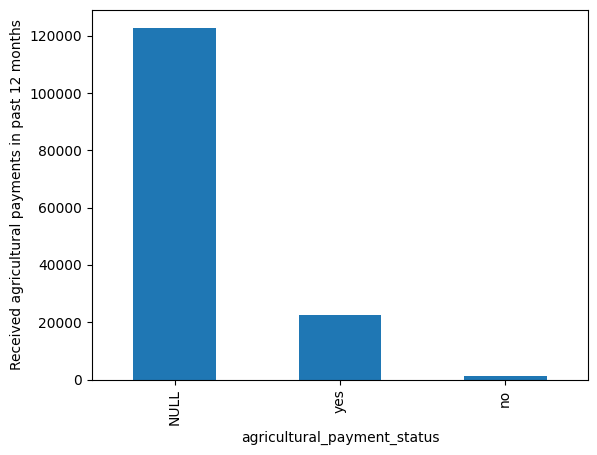

In [814]:
barplot(df, 'agricultural_payment_status', lim=20, yname='Received agricultural payments in past 12 months')

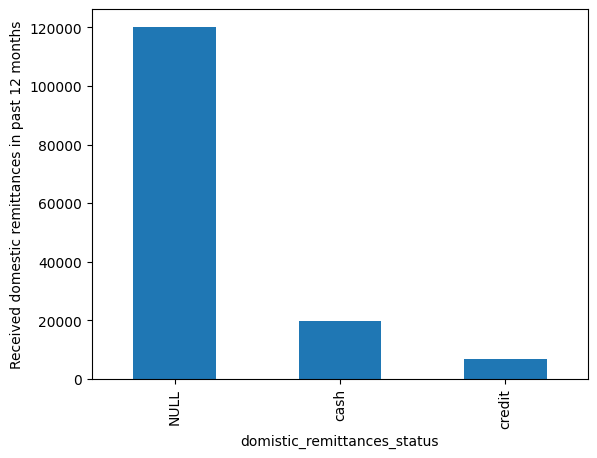

In [815]:
barplot(df, 'domistic_remittances_status', lim=20, yname='Received domestic remittances in past 12 months')

In [816]:
def boxplot(df, col, group_by, samp_size=10000):

    '''
    This function makes a box plot for a Spark dataframe df
    grouping them by a column name called group_by and their
    aggrigate on another column called col.
    '''

    # Selecting sample for the large dataset
    # For samll data sampling is not done. For the large data
    # sample size is the specified number.

    true_samp_size = min(samp_size/df.count(), 1.0)
    pd_df = df.sample(False, true_samp_size).toPandas()

    # Making plot
    pd_df.boxplot(col, by=group_by, figsize=(25, 5))
    plt.ylabel(col)
    plt.title(None)
    plt.show()

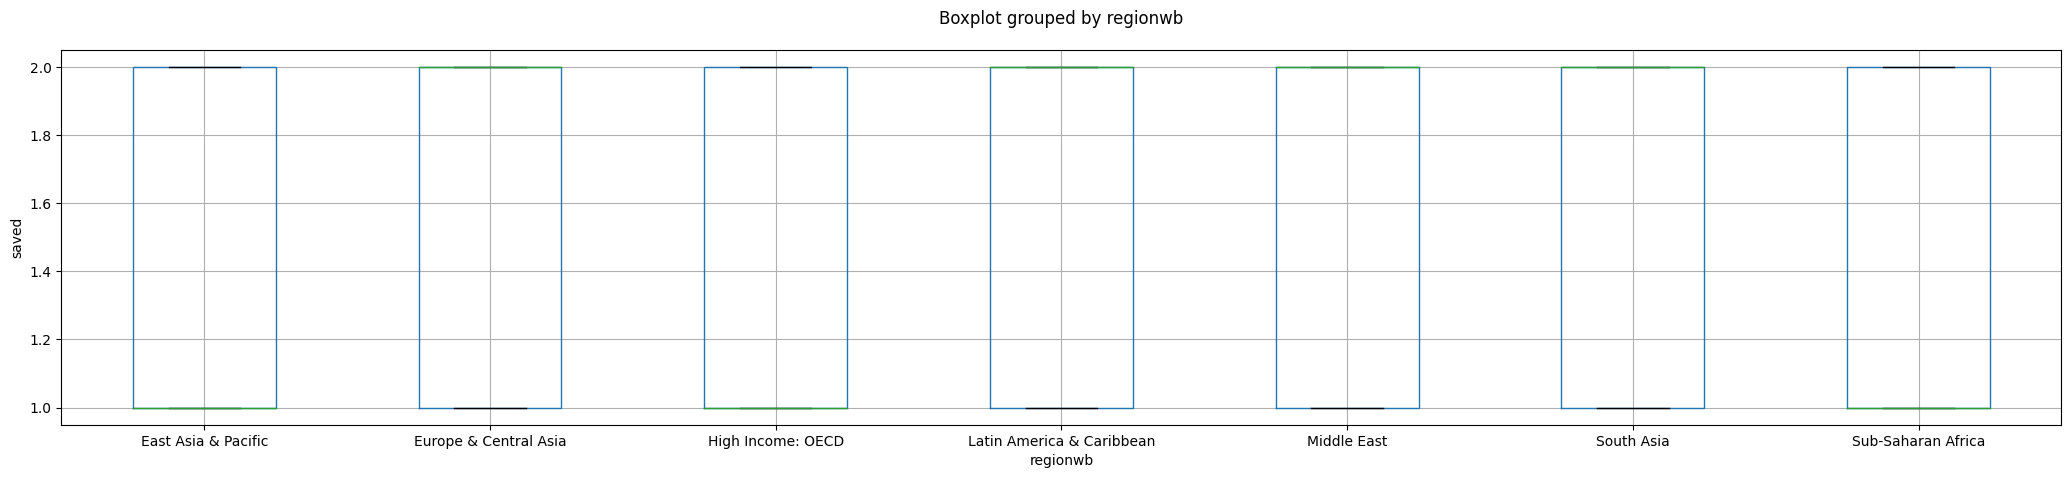

In [817]:
boxplot(df, 'saved', 'regionwb')

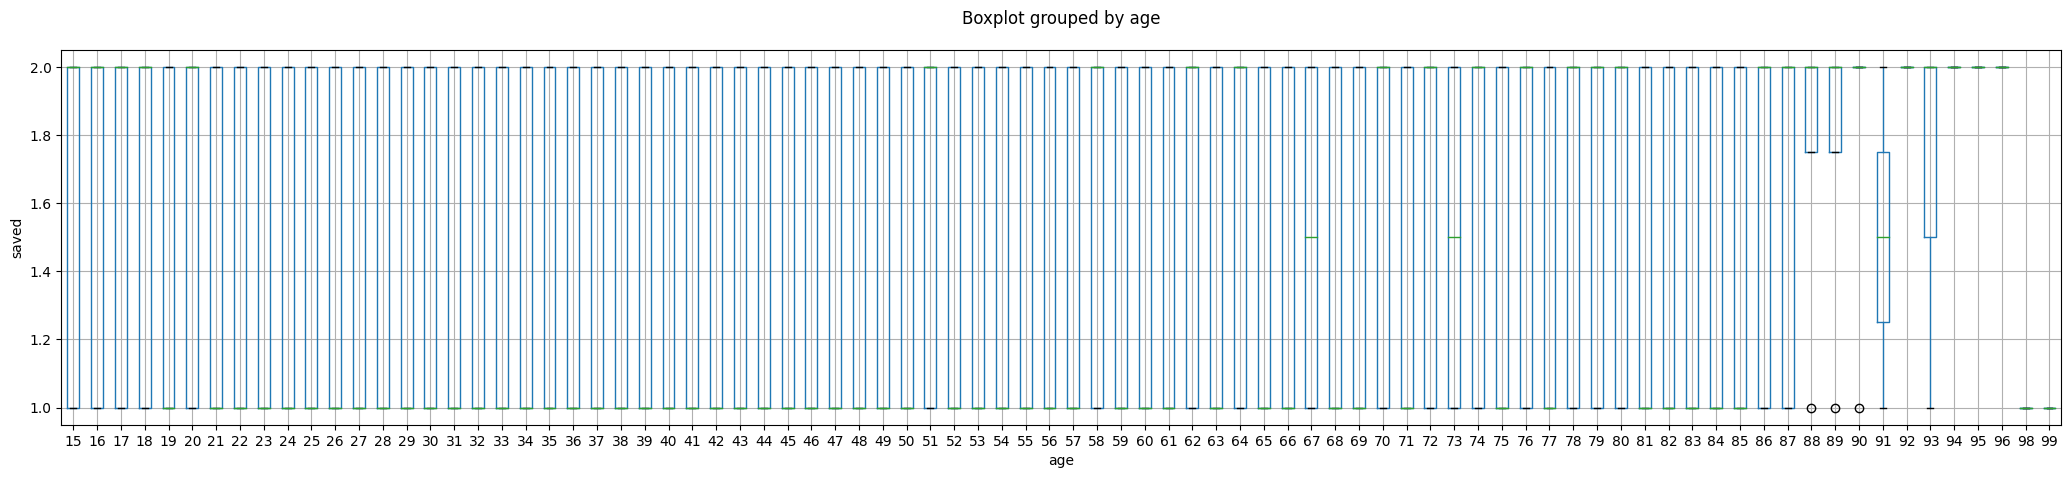

In [818]:
boxplot(df, 'saved', 'age')

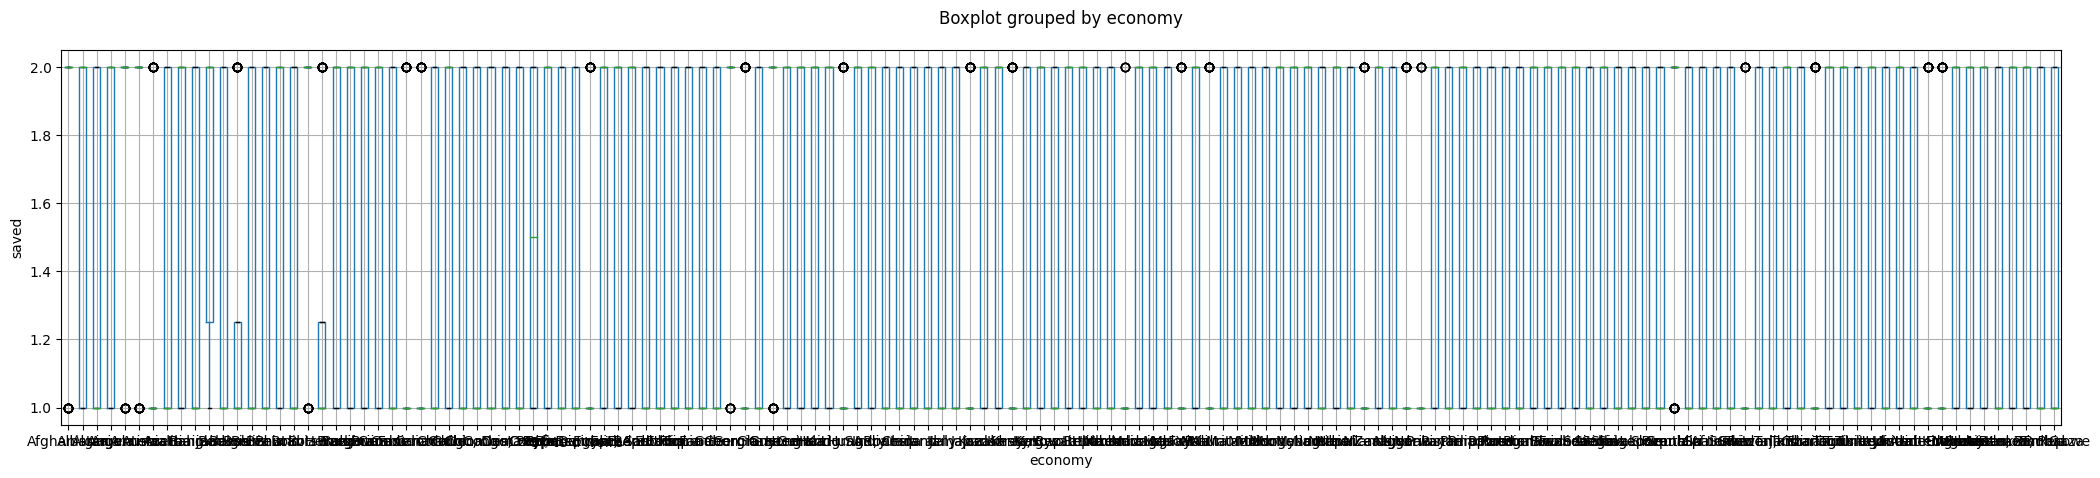

In [819]:
boxplot(df, 'saved', 'economy')

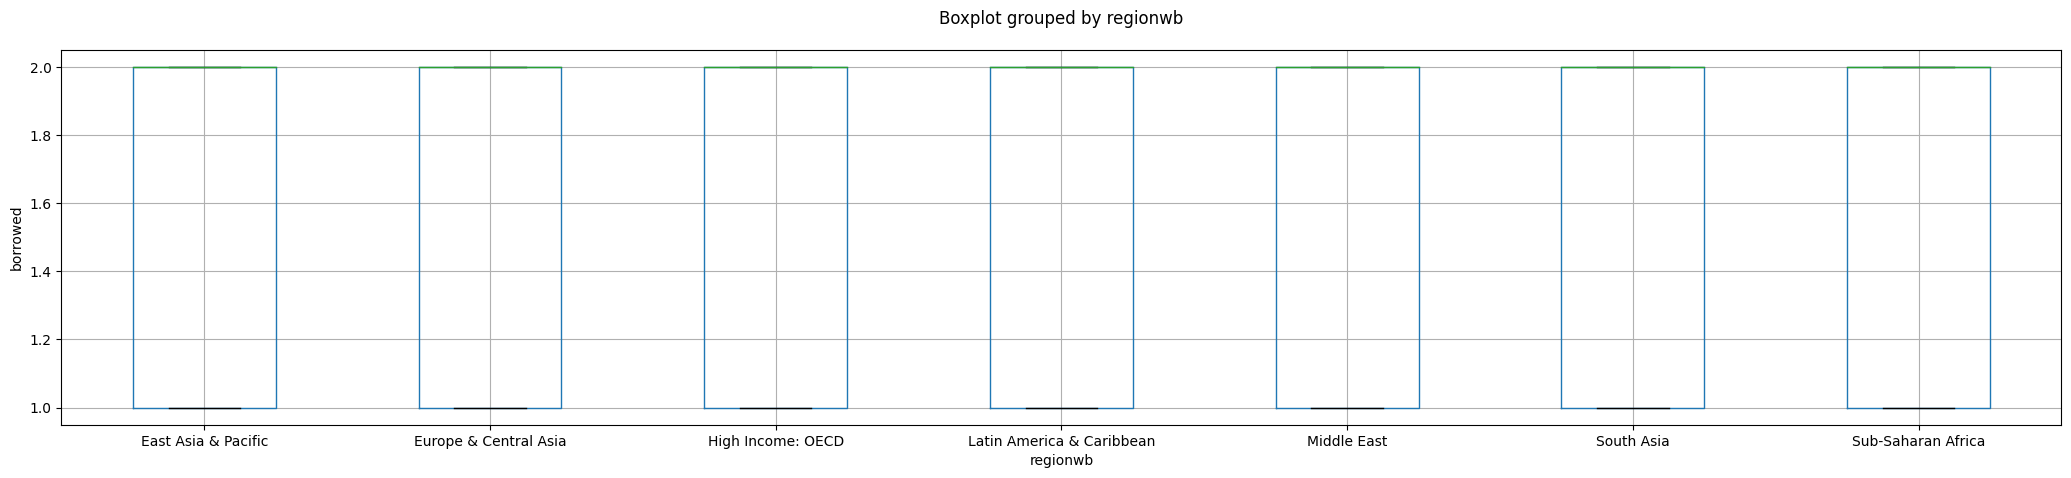

In [820]:
boxplot(df, 'borrowed', 'regionwb')

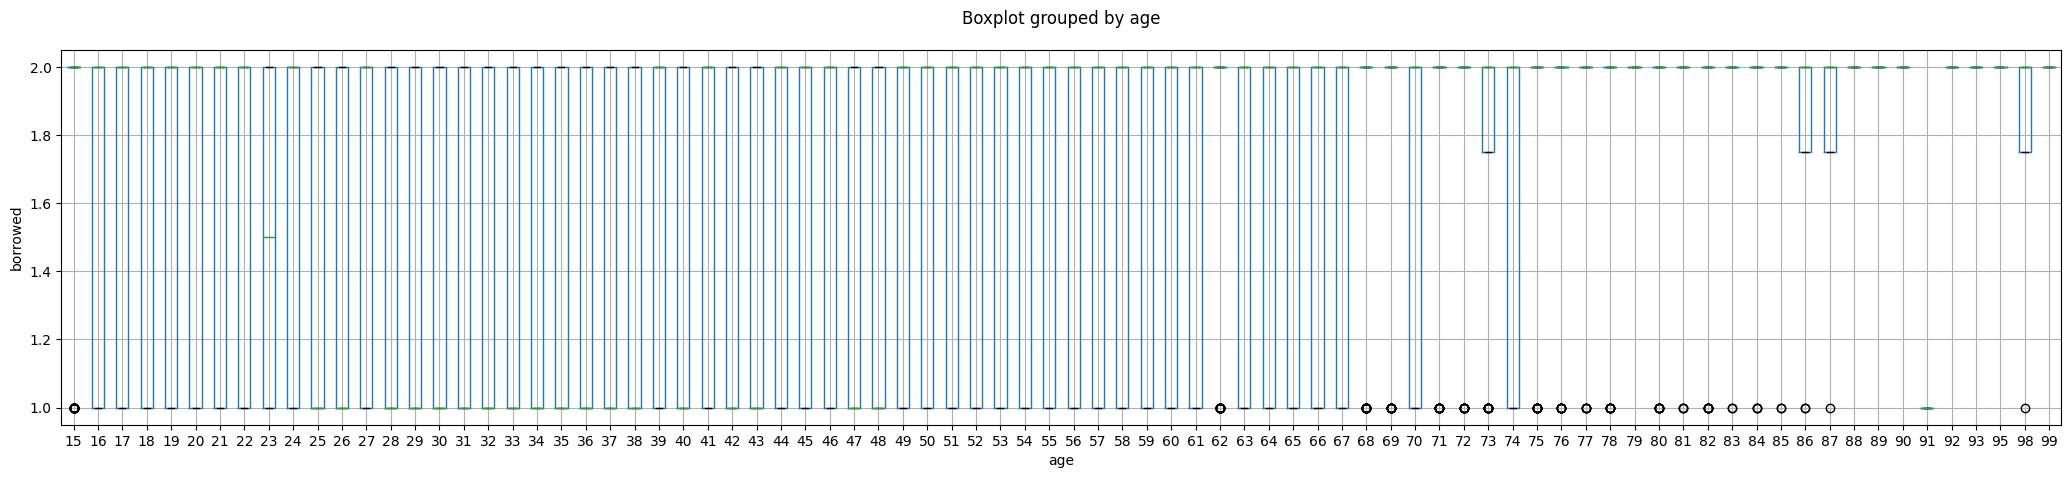

In [821]:
boxplot(df, 'borrowed', 'age')

In [822]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when
from pyspark.sql.types import IntegerType
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler, StandardScaler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

# Initialize Spark Session
spark = SparkSession.builder.appName('PySparkBinaryClassification').getOrCreate()


# Ensure the target variable 'borrowed' is binary
# Here, assuming '1' is one class and combining all other classes into '0'
df = df.withColumn('borrowed', when(df['borrowed'] == 2, 0).otherwise(1))

# Selecting a subset of columns for the example, include relevant columns in your analysis
categoricalColumns = ['economy', 'regionwb',  'gender_status', 'education_level_status', 'financial_account_status', 'online_bill_payment_status', 'domistic_remittances_status', 'utility_bill_payment_status', 'agricultural_payment_status', 'savings_status']
numericCols = ['age', 'educ', 'q3', 'q4', 'q6', 'q8a', 'q8b', 'q8c', 'q8d', 'q8e', 'q8f', 'q8g', 'q8h', 'q8i', 'q9', 'q10', 'q11', 'q12', 'q13', 'q14', 'q18b', 'q21b', 'q25', 'q26', 'q27a', 'q27b', 'q27c', 'q27d', 'q28', 'q29a', 'q29b', 'q29c', 'q29d', 'q31a', 'q31b', 'q31c', 'q32', 'q33a', 'q33b', 'q33c', 'q35', 'q36a', 'q36bc', 'q36d', 'q37', 'q38', 'q40a', 'q40bc', 'q40d', 'q41', 'q42', 'q43', 'q44a', 'q44b', 'q44c']
labelCol = 'borrowed'

# Stages for the pipeline
stages = []

# Indexing and encoding categorical features
for categoricalCol in categoricalColumns:
    stringIndexer = StringIndexer(inputCol=categoricalCol, outputCol=categoricalCol + 'Index')
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    stages += [stringIndexer, encoder]

# VectorAssembler to combine feature columns into a single feature vector
assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

# StandardScaler to scale the features
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures")
stages += [scaler]

# Split the dataset into training and testing sets
(train, test) = df.randomSplit([0.8, 0.2], seed=42)

In [823]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
# Function for calculating accuracy
def calculate_accuracy(predictions):
  accuracy_evaluator = MulticlassClassificationEvaluator(labelCol="borrowed", predictionCol="prediction", metricName="accuracy")
  accuracy = accuracy_evaluator.evaluate(predictions)
  return accuracy

In [824]:
# Function for calculating ROC and F1 Score
def calculate_roc_f1(predictions):
    binary_evaluator = BinaryClassificationEvaluator(labelCol=labelCol)
    roc = binary_evaluator.evaluate(predictions)
    multiclass_evaluator = MulticlassClassificationEvaluator(labelCol=labelCol, metricName="f1")
    f1 = multiclass_evaluator.evaluate(predictions)
    return roc, f1

In [825]:
from pyspark.ml.evaluation import RegressionEvaluator

# Function for calculating MSE and RMSE
def calculate_mse_rmse(predictions):
    evaluator = RegressionEvaluator(labelCol="borrowed", predictionCol="prediction")
    mse = evaluator.evaluate(predictions, {evaluator.metricName: "mse"})
    rmse = evaluator.evaluate(predictions, {evaluator.metricName: "rmse"})
    return mse, rmse

# LogisticRegression (LR)

In [826]:
# Logistic Regression model
lr = LogisticRegression(featuresCol="scaledFeatures", labelCol=labelCol, maxIter=10)
stages += [lr]

# Define the pipeline
pipeline = Pipeline(stages=stages)

# Fit the model
model = pipeline.fit(train)

# Make predictions
predictions_lr = model.transform(test)

In [827]:
# Evaluate the model
roc_lr, f1_lr = calculate_roc_f1(predictions_lr)
print(f"Test Area Under ROC: {roc_lr}")
print(f"Test F1 Score: {f1_lr}")

Test Area Under ROC: 0.7949804908944491
Test F1 Score: 0.7241357152303849


In [828]:
# Calculate accuracy for a model
accuracy_lr = calculate_accuracy(predictions_lr)
print(f"Accuracy: {accuracy_lr}")

Accuracy: 0.7337044290966567


In [829]:
# Calculate MSE and RMSE
mse_lr, rmse_lr = calculate_mse_rmse(predictions_lr)
print(f"Mean Squared Error (MSE): {mse_lr}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr}")

Mean Squared Error (MSE): 0.2662955709033433
Root Mean Squared Error (RMSE): 0.5160383424740291


# Decision Tree (DT)

In [830]:
from pyspark.ml.classification import DecisionTreeClassifier

dt = DecisionTreeClassifier(featuresCol="scaledFeatures", labelCol="borrowed")
stages[-1] = dt  # Assuming stages[-1] is the place for the model in the pipeline

# Define the pipeline
pipeline_dt = Pipeline(stages=stages)

# Fit the model
model_dt = pipeline_dt.fit(train)

# Make predictions
predictions_dt = model_dt.transform(test)

In [831]:
# Evaluate the model
roc_dt, f1_dt = calculate_roc_f1(predictions_dt)
print(f"Test Area Under ROC: {roc_dt}")
print(f"Test F1 Score: {f1_dt}")

Test Area Under ROC: 0.4487487967185168
Test F1 Score: 0.6890965597605697


In [832]:
# Calculate accuracy for a model
accuracy_dt = calculate_accuracy(predictions_dt)
print(f"Accuracy: {accuracy_dt}")

Accuracy: 0.7103047795759887


In [833]:
# Calculate MSE and RMSE
mse_dt, rmse_dt = calculate_mse_rmse(predictions_dt)
print(f"Mean Squared Error (MSE): {mse_dt}")
print(f"Root Mean Squared Error (RMSE): {rmse_dt}")

Mean Squared Error (MSE): 0.28969522042401125
Root Mean Squared Error (RMSE): 0.5382334255915469


# Support Vector Classifier (SVC)

In [834]:
from pyspark.ml.classification import LinearSVC

svc = LinearSVC(featuresCol="scaledFeatures", labelCol="borrowed")
stages[-1] = svc  # Assuming stages[-1] is the place for the model in the pipeline

# Define the pipeline
pipeline_svc = Pipeline(stages=stages)

# Fit the model
model_svc = pipeline_svc.fit(train)

# Make predictions
predictions_svc = model_svc.transform(test)

In [835]:
# Evaluate the model
roc_svc, f1_svc = calculate_roc_f1(predictions_svc)
print(f"Test Area Under ROC: {roc_svc}")
print(f"Test F1 Score: {f1_svc}")

Test Area Under ROC: 0.7836732322737233
Test F1 Score: 0.7089216265439015


In [836]:
# Calculate accuracy for a model
accuracy_svc = calculate_accuracy(predictions_svc)
print(f"Accuracy: {accuracy_svc}")

Accuracy: 0.724495756451225


In [837]:
# Calculate MSE and RMSE
mse_svc, rmse_svc = calculate_mse_rmse(predictions_svc)
print(f"Mean Squared Error (MSE): {mse_svc}")
print(f"Root Mean Squared Error (RMSE): {rmse_svc}")

Mean Squared Error (MSE): 0.27550424354877506
Root Mean Squared Error (RMSE): 0.5248849812566321


# Naive Bayes Model (NB)

In [838]:
from pyspark.ml.classification import NaiveBayes
nb = NaiveBayes(featuresCol="scaledFeatures", labelCol="borrowed")
stages[-1] = nb  # Assuming stages[-1] is the place for the model in the pipeline

# Re-define the pipeline with new stages
pipeline = Pipeline(stages=stages)

# Everything else remains the same
model = pipeline.fit(train)
predictions_nb = model.transform(test)

In [839]:
# Evaluation
roc_nb, f1_nb = calculate_roc_f1(predictions_nb)
print(f"Test Area Under ROC: {roc_nb}")
print(f"Test F1 Score: {f1_nb}")

Test Area Under ROC: 0.4507367746560184
Test F1 Score: 0.639508401911495


In [840]:
# Calculate accuracy for a model
accuracy_nb = calculate_accuracy(predictions_nb)
print(f"Accuracy: {accuracy_nb}")

Accuracy: 0.6397622238257225


In [841]:
# Calculate MSE and RMSE
mse_nb, rmse_nb = calculate_mse_rmse(predictions_nb)
print(f"Mean Squared Error (MSE): {mse_nb}")
print(f"Root Mean Squared Error (RMSE): {rmse_nb}")

Mean Squared Error (MSE): 0.36023777617427755
Root Mean Squared Error (RMSE): 0.6001981141042327


# Random Forest (RF)

In [842]:
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(featuresCol="scaledFeatures", labelCol="borrowed")
stages[-1] = rf  # Assuming stages[-1] is the place for the model in the pipeline

# Re-define the pipeline with new stages
pipeline = Pipeline(stages=stages)

# Everything else remains the same
model = pipeline.fit(train)
predictions_rf = model.transform(test)

In [843]:
# Evaluation
roc_rf, f1_rf = calculate_roc_f1(predictions_rf)
print(f"Test Area Under ROC: {roc_rf}")
print(f"Test F1 Score: {f1_rf}")

Test Area Under ROC: 0.761419190270206
Test F1 Score: 0.6990409308850636


In [844]:
# Calculate accuracy for a model
accuracy_rf = calculate_accuracy(predictions_rf)
print(f"Accuracy: {accuracy_rf}")

Accuracy: 0.7148747551798784


In [845]:
# Calculate MSE and RMSE
mse_rf, rmse_rf = calculate_mse_rmse(predictions_rf)
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf}")

Mean Squared Error (MSE): 0.28512524482012164
Root Mean Squared Error (RMSE): 0.5339712022385866


# Gradient Boosting (GB)

In [846]:
from pyspark.ml.classification import GBTClassifier

gbt = GBTClassifier(featuresCol="scaledFeatures", labelCol=labelCol)
stages[-1] = gbt  # Assuming stages[-1] is the place for the model in the pipeline

# Re-define the pipeline with new stages
pipeline = Pipeline(stages=stages)

# Everything else remains the same
model = pipeline.fit(train)
predictions_gbt = model.transform(test)

In [847]:
# Evaluation
roc_gbt, f1_gbt = calculate_roc_f1(predictions_gbt)
print(f"Test Area Under ROC: {roc_gbt}")
print(f"Test F1 Score: {f1_gbt}")

Test Area Under ROC: 0.7914408351561498
Test F1 Score: 0.7190028104464201


In [848]:
# Calculate accuracy for a model
accuracy_gbt = calculate_accuracy(predictions_gbt)
print(f"Accuracy: {accuracy_gbt}")

Accuracy: 0.7293406178057245


In [849]:
# Calculate MSE and RMSE
mse_gbt, rmse_gbt = calculate_mse_rmse(predictions_gbt)
print(f"Mean Squared Error (MSE): {mse_gbt}")
print(f"Root Mean Squared Error (RMSE): {rmse_gbt}")

Mean Squared Error (MSE): 0.2706593821942755
Root Mean Squared Error (RMSE): 0.5202493461738087


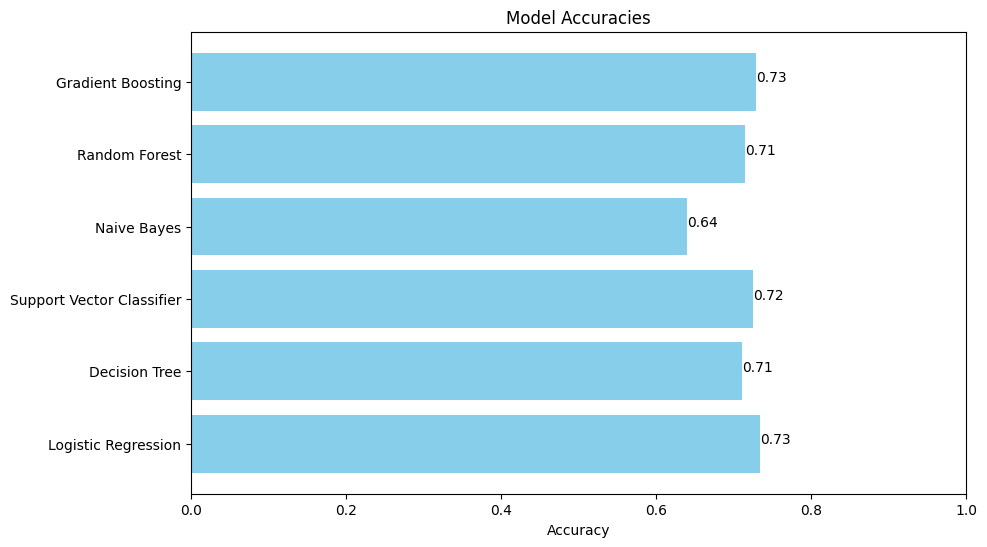

In [850]:
import matplotlib.pyplot as plt

# Simulated accuracies for demonstration purposes
model_names = ['Logistic Regression', 'Decision Tree', 'Support Vector Classifier', 'Naive Bayes', 'Random Forest', 'Gradient Boosting']
accuracies = [accuracy_lr, accuracy_dt, accuracy_svc, accuracy_nb, accuracy_rf, accuracy_gbt]  # Placeholder accuracies

plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracies')
plt.xlim(0, 1)  # Assuming accuracy ranges from 0 to 1
for index, value in enumerate(accuracies):
    plt.text(value, index, f'{value:.2f}')
plt.show()

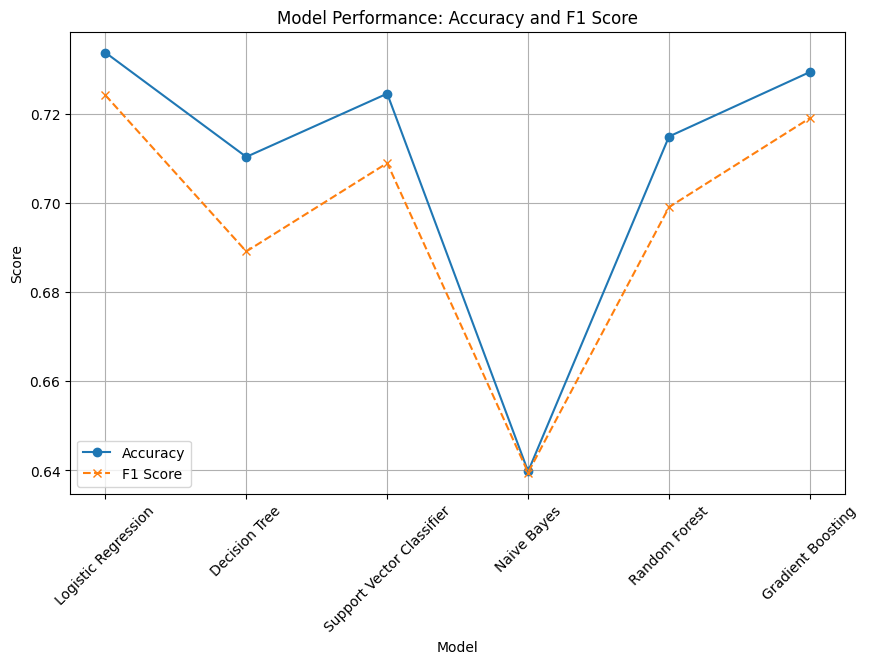

In [851]:
f1_scores = [f1_lr, f1_dt, f1_svc, f1_nb, f1_rf, f1_gbt]

# Generate line graph
plt.figure(figsize=(10, 6))

# Plot both accuracies and F1 scores
plt.plot(model_names, accuracies, label='Accuracy', marker='o')
plt.plot(model_names, f1_scores, label='F1 Score', linestyle='--', marker='x')

# Adding titles and labels
plt.title('Model Performance: Accuracy and F1 Score')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.legend()

# Show grid
plt.grid(True)

plt.show()

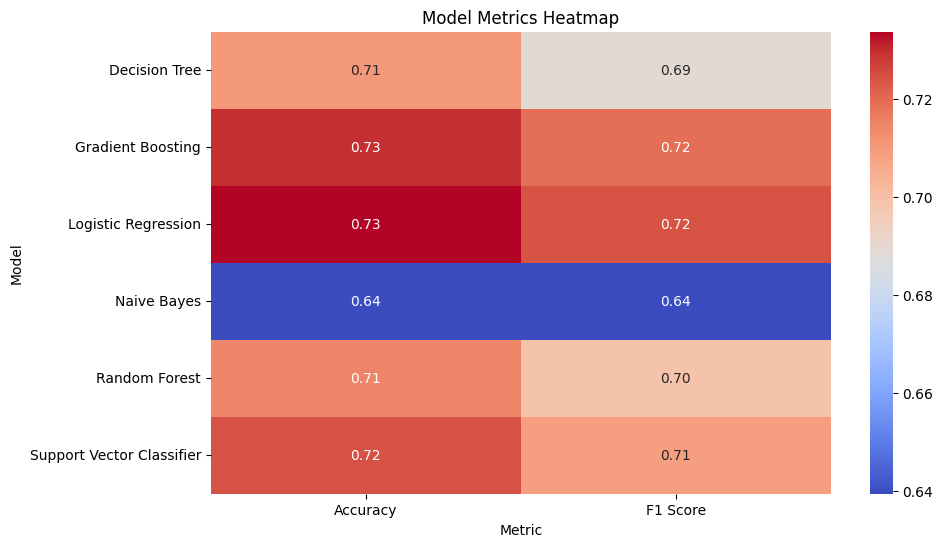

In [852]:
import pandas as pd
import seaborn as sns

# Sample data - replace these with your actual model metrics
data = [
    ("Logistic Regression", "Accuracy", accuracy_lr),
    ("Logistic Regression", "F1 Score", f1_lr),
    ("Decision Tree", "Accuracy", accuracy_dt),
    ("Decision Tree", "F1 Score", f1_dt),
    ("Support Vector Classifier", "Accuracy", accuracy_svc),
    ("Support Vector Classifier", "F1 Score", f1_svc),
    ("Naive Bayes", "Accuracy", accuracy_nb),
    ("Naive Bayes", "F1 Score", f1_nb),
    ("Random Forest", "Accuracy", accuracy_rf),
    ("Random Forest", "F1 Score", f1_rf),
    ("Gradient Boosting", "Accuracy", accuracy_gbt),
    ("Gradient Boosting", "F1 Score", f1_gbt)
]

# Creating a PySpark DataFrame
schema = ["Model", "Metric", "Score"]
df = spark.createDataFrame(data, schema=schema)

# Convert PySpark DataFrame to Pandas DataFrame for plotting
pdf = df.toPandas()

# Pivot the DataFrame to make it suitable for a heatmap
pivot_df = pdf.pivot("Model", "Metric", "Score")

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Model Metrics Heatmap')

# Display the plot
plt.show()

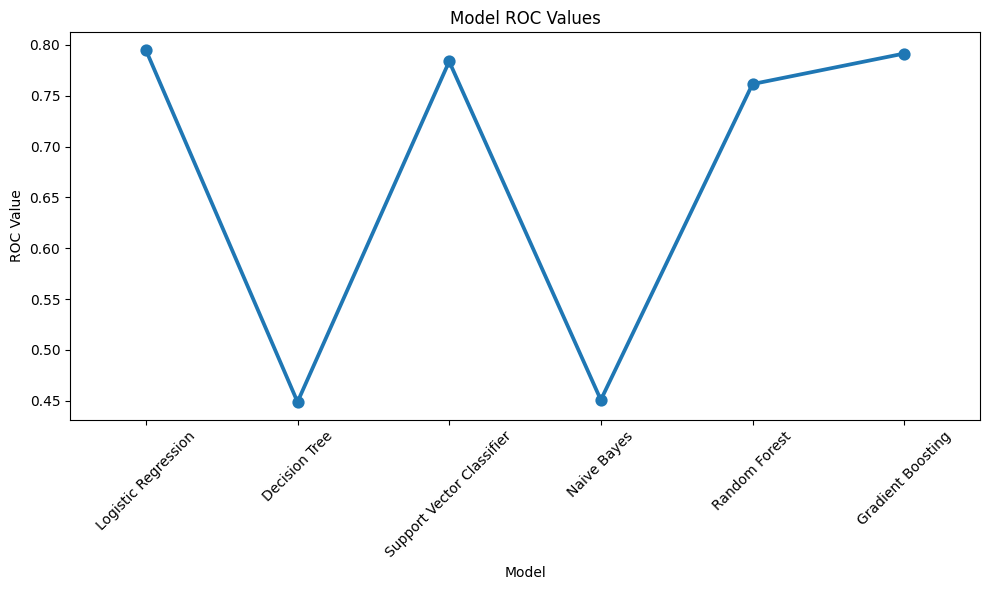

In [853]:
roc_values = [roc_lr, roc_dt, roc_svc, roc_nb, roc_rf, roc_gbt]  # Replace these with your actual ROC values

# Creating a DataFrame for plotting
data = pd.DataFrame({
    'Model': model_names,
    'ROC Value': roc_values
})

# Generating the point plot
plt.figure(figsize=(10, 6))
sns.pointplot(x='Model', y='ROC Value', data=data)
plt.title('Model ROC Values')
plt.xlabel('Model')
plt.ylabel('ROC Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

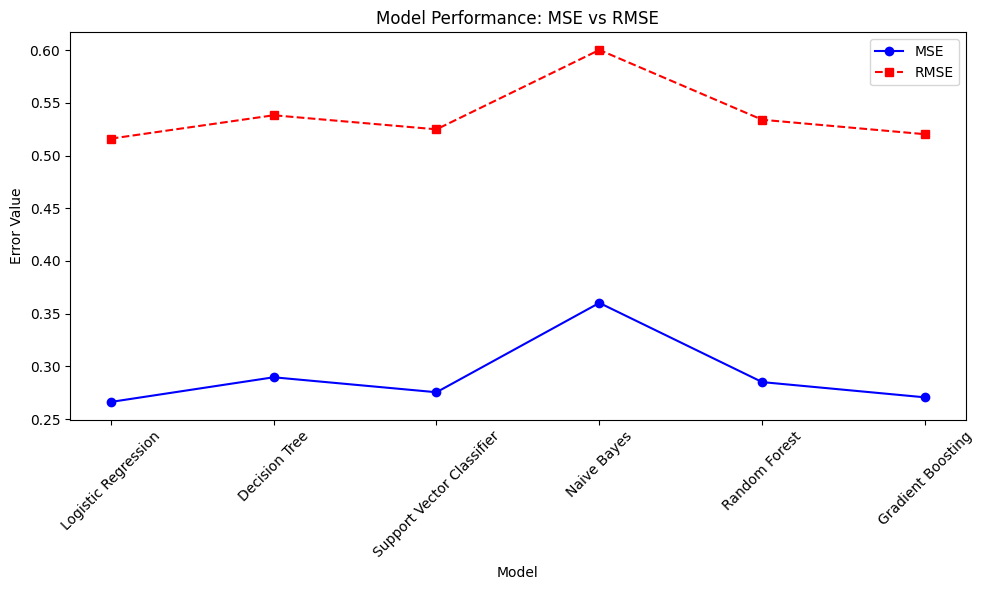

In [854]:
# Placeholder MSE and RMSE values for demonstration
mses = [mse_lr, mse_dt, mse_svc, mse_nb, mse_rf, mse_gbt]
rmses = [rmse_lr, rmse_dt, rmse_svc, rmse_nb, rmse_rf, rmse_gbt]

plt.figure(figsize=(10, 6))

# Plot MSE
plt.plot(model_names, mses, label='MSE', marker='o', linestyle='-', color='blue')

# Plot RMSE
plt.plot(model_names, rmses, label='RMSE', marker='s', linestyle='--', color='red')

plt.title('Model Performance: MSE vs RMSE')
plt.xlabel('Model')
plt.ylabel('Error Value')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

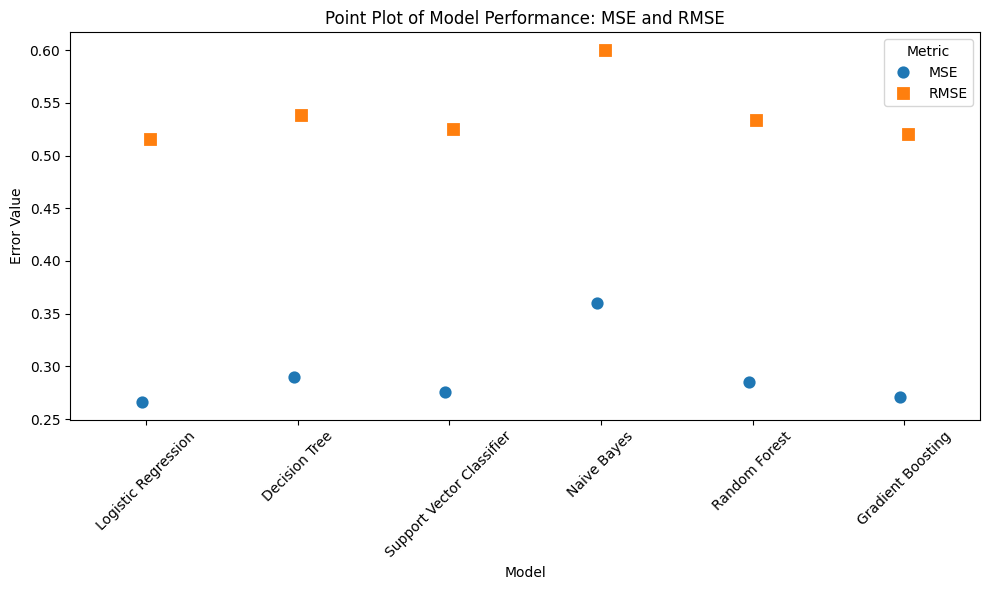

In [855]:
# Creating a DataFrame for plotting
data = pd.DataFrame({
    'Model': model_names * 2,  # Each model appears twice
    'Value': mses + rmses,  # Values for MSE and then RMSE
    'Metric': ['MSE'] * len(mses) + ['RMSE'] * len(rmses)  # Labeling the metric type
})

# Generating the point plot
plt.figure(figsize=(10, 6))
sns.pointplot(x='Model', y='Value', hue='Metric', data=data, join=False, dodge=True, markers=['o', 's'], capsize=0.1)
plt.title('Point Plot of Model Performance: MSE and RMSE')
plt.xlabel('Model')
plt.ylabel('Error Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

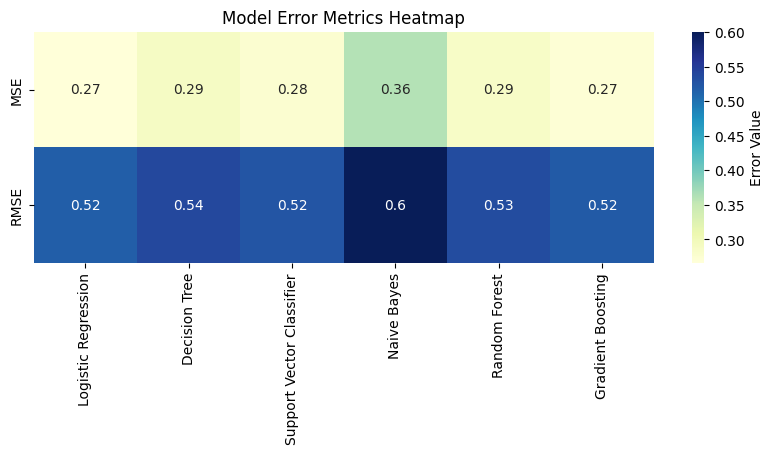

In [856]:
import numpy as np

# Constructing a DataFrame for the heatmap
df = pd.DataFrame([mses, rmses], index=["MSE", "RMSE"], columns=model_names)

# Generating the heatmap
plt.figure(figsize=(10, 3))
sns.heatmap(df, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Error Value'})
plt.title("Model Error Metrics Heatmap")
plt.show()